## Freda Qifei Yuan 
### QMSS GR5074 Projects in Advanced Machine Learning
### Final Project
### May 12, 2022

# Q1: [10 pts] describe in detail the substantive problem you are interested in working on for this assignment


## Research Question
This project aims to explore the genetic predisposition of an individual from a facial image. Under the broad umbrella of genetic predisposition topic, this project focuses on the likelihood to commit crime and engage in violent behaviors. 

I classify this genetic persona into two extreme categories: "unsavory" and "savory". "Unsavory" individuals have high tendency of being "convicted felons", or "Bad Guys." By comparison, "Savory" individuals are more likely to be "ordinary" people who follow the laws, or "Good Guys." Therefore, this project hopes to develop appropriate Deep Learning models to classify the "Good Guys" and "Bad Guys" based on facial images. 


It is noteworthy that actual individual personality does not equal to genetic predisposition. Actual persona is largely influenced by external environments such as education and lifetime experiences, rather than solely determined by genetics. The discussion of "nature" vs. "nurture" is beyond the current scope of this project. This project is by no means to discriminate individuals based on their appearances or genetic compositions. It provides value as a means to further explore the relationship between genetic predisposition and facial morphology. Therefore, while this project can serve as a strong classifier for extreme genetic predisposition, one should never mistakenly apply the result as individual's true personality. 



---



# Q2: [10 pts] describe your data (including the features, target, and the general type of data you are working with)


## 2.1 Data Source
This dataset is downloaded from Kaggle, and contributed by Gerry Piosenka. All data in this dataset was collected from public websites or databases. Below is an appropriate citation of the dataset:   
Gerry Piosenka  (2022, March). Good Guys-Bad Guys Image Data Set, Version 1. Retrieved May 7, 2022 from https://www.kaggle.com/datasets/gpiosenka/good-guysbad-guys-image-data-set/. 

## 2.2 Data Type
I am using RGB images data, specifically the facial images of various individuals. These images have been cropped from the orginal downloaded images, in order to remove noisy backgrounds. 

### (1) Input Size
The unpreprocessed cropped images have various sizes. By examining 200 random training samples, I obtained an average height of 377, average width of 294, and average aspect ratio h/w of 1.2823. As decided by the original author, 300 pixel height should be adequate fo capture image features. The width of 233 pixel is calculated by the average aspect ratio. Lastly, because the image is in the RGB format, the image size is [300,233,3]. 

## 2.3 Feature
The dataset is a diverse image portfolio of age, sex, and race. In addition to biological facial traits, the samples also contain various emotions, with the most common being a smile face. Other individual identifier is also included, such as "glasses vs. no glasses", "long hair vs. short hair" ; "beard" vs. "no beard." These features could be recognized by the deep learning models as potential classifiers. 

## 2.4 Target
The target is binary classification outcome. The output = 0 is "savory", and = 1 is "unsavory."


## 2.5 Train, Test, Validation Sets
- There are 12420 images in total. 
- The training set has 5610 images in the "savory" class and 5610 images in the "unsavory" class. 
- The test set has 300 images in "savory" class and 300 image in "unsavory" class. 
- The validation set has 300 images in "savory" class and 300 image in "unsavory" class. 
- Images in train, validation, and test sets are not from same individuals. 





---


# Q3: [10 pts] describe why you think Deep Learning systems would be a good methodological choice, and the specific architecture(s) you think appropriate to explore


## 3.1 Why Deep Learning?
Computer vision typically leverages deep learning models to identify and classify images. There are two well-recognized reasons:

(1) Deep learning works well with unstructured data such as images, audio, and videos. Classical Machine Learning algorithms have limited ability to analyze unstructured data, resulting a massive loss of information.  

(2) Deep learning is more efficient at learning complex features and performing intensive computations. Deep learning can execute feature engineering by itself. Having multiple layers in neural networks allow it to identify both the simple and complicated patterns. The deep architecture also enables a massive amount of parameters computation. Therefore, deep learning models can extract the most relevant features from the image, which suits well for image inspectation and classification tasks like this.

## 3.2 Applied Architecture Introduction
I will explore six different architectures below. 
- Model 1: Simple CNN + Learning rate scheduler with callback
- Model 2: CNN + Batch Normalization + Dropout
- Model 3: Deeper CNN: More Convolutional Layers + More Filters
- Model 4: SqueezeNet: CNN + SqueezeNet architecture
- Model 5: ResNet50: transfer learning
- Model 6: EfficientNet: transfer learning 


1.  **Model 1** is an preliminary exploration model. It aims to examine the general application of neural network in addressing this problem. **All of my six models are trained with learning rate scheduling with callbacks. **

  - Learning rate is a hyperparameter that is used when calculating the new weight during backpropagation. The learning rate helps determine how much the weight change. I set a learning rate decay scheduler to reduce learning rate by half when validation accuracy does not improve for consecutive two epchoes. This could help to seek for higher accuracy. Early in the process, the learning rate is set to be large in order to reach a set of weights that are good enough. Later, smaller learning rate can be applied to tune weights towards a higher accuracy. The learning rate scheduler is added for every model below. 



2. **Model 2** is built on Model 1. Model 2 adds batch normalization layers, dropout layers to the simple CNN.
  - **Batch normalization** is used to make the training process faster and more stable. The batch normalization layer standardizes and normalizes the activation vectors using the mean and standard deviation of current batch. In this way, each neuron's output follows a standard normal distribution across the batch. Therefore, it could address the internal covariate shift problem. 

  - **Dropout layer** is used to prevent overfitting. Dropout is a regularization method that randomly ignores some number of layer outputs during training. By doing so, it introduces noise in training and thus renders the model to adapt more general patterns. In addition, it provides the opportunity to correct mistakes from prior layers, making the model more robust. 

3. **Model 3** is a deeper version of model 1, with 9 more convolutional layers and 2 more fully connected layers, and more filters. I hope to explore if a deeper network with larger filters performs better in this task. The number of filters (channels) increases in later layers, in the hope to capture more complicated patterns in the picture. 

4. **Model 4** added SqueezeNet into the CNN architecture. Proposed by Iandola etc, SqueezeNet is commonly used to address image classification problem. SqueezeNet is a smaller architecture with less parameters, while maintaining accuracy. (Iandola etc, 2016) I only employed the SqueezeNet architecture **without** carrying the pretrained weights. I hope to use it to compare against the other non-transfer learning approaches (Model 1,2,3). 

  The code of constructing the SqueezeNet is downloaded from Course Github Repository, Week07-CNN-Starter-Code jupyter notebook. (Marco, 2022)

5. **Model 5** introduces transfer learning using ResNet50. The original idea of deep residual learning is proposed by He, Zhang, Ren, and Sun in 2016. As a variant of residual learning model, ResNet50 has 48 convolutional layers along with 1 MaxPool and 1 Average Pool layer. 
  - The main benefit of ResNet model is to avoid poor accuracy as the model becomes deeper. The ResNet also aims to address the Vanishing Gradient issue. 
  - Within a single residual block, initial X input is added to the output of second convolved layers. By doing so, the model adds previous input to carry information forward in the network. 
  - The model has been pretrained on ImageNet and I downloaded the base model from Keras Applications. 


6. **Model 6** is another transfer learning experiment using EfficientNet. This approach is recommended by the dataset owner Gerry Piosenka in his Kaggle notebook 'Human Character Classification F1 score=99.17'. 
  - EfficientNet is a new scaling method that uniformly scales all dimensions of depth/width/resolution using a simple yet highly effective compound coefficient. (Tan and Le, 2019)
  - Scaling up ConvNets is widely used to achieve better accuracy. There are three ways to scale up: by depth, width, or image resolution. Combining all three ways, Efficient Net uniformly scales network width, depth, and resolution with fixed scaling coefficients. It has proven record of transfer learning accuracy. The model has been pretrained on ImageNet and I downloaded the base model from Keras Applications. At the end of EffieicentNet, I added three dense layers and 2 dropout layers to adapt for this problem. 
  - The EfficientNet model has been pretrained on ImageNet and I downloaded the base model from Keras Applications. 



---


# Q4: [50 pts] show the code and outputs of 3-5 different experiments with variants of your proposed architecture(s)

### 4.1 Content:

Under each model's section, you could find:
1. Model architecture 
2. Training history with 30 epoches
3. Best epoches
4. Training & validation loss plot
5. Training & validation accuracy plot

### 4.2 Note:
1. To maintain the model comparability, all models are trained with a batch size of 30, 30 epoches, Adam Optimizer, same learning rate decay call back schedule. 

2. The introductions of models are in "3.2 Applied Architecture Introduction." The intepretation/ evaluation of model performance is in "5.2 Model Performance Evaluation."

## Preprocessing & Sample Visualization

### Citation: 
The **image preprocessing section** and **"training and validation loss/accuracy plots"** are from the original data owner, Gerry Piosenka. 
The original code link is: https://www.kaggle.com/code/gpiosenka/human-character-classification-f1-score-99-17

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
# pprevent annoying tensorflow warning
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import warnings
warnings.simplefilter("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip gdrive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/unsavory/1223.jpg  
  inflating: train/unsavory/1224.jpg  
  inflating: train/unsavory/1225.jpg  
  inflating: train/unsavory/1226.jpg  
  inflating: train/unsavory/1227.jpg  
  inflating: train/unsavory/1228.jpg  
  inflating: train/unsavory/1229.jpg  
  inflating: train/unsavory/1230.jpg  
  inflating: train/unsavory/1231.jpg  
  inflating: train/unsavory/1232.jpg  
  inflating: train/unsavory/1233.jpg  
  inflating: train/unsavory/1234.jpg  
  inflating: train/unsavory/1235.jpg  
  inflating: train/unsavory/1236.jpg  
  inflating: train/unsavory/1237.jpg  
  inflating: train/unsavory/1238.jpg  
  inflating: train/unsavory/1239.jpg  
  inflating: train/unsavory/1240.jpg  
  inflating: train/unsavory/1241.jpg  
  inflating: train/unsavory/1242.jpg  
  inflating: train/unsavory/1243.jpg  
  inflating: train/unsavory/1244.jpg  
  inflating: train/unsavory/1245.jpg  
  inflating: train/unsavory/1246.jpg  
  inflating: 

In [5]:
# read in the character.csv file
path = "/content/character.csv"
df = pd.read_csv(path)

datasets=df.groupby('data set')
train_df=datasets.get_group('train')
test_df=datasets.get_group('test')
valid_df=datasets.get_group('valid')

# print out an imagepath to check
print(train_df['filepaths'].iloc[0])
print('train_df length: ', len(train_df), '  test_df length: ',len(test_df), '  valid_df length: ', len(valid_df))
# check the class sample balance of the train_df dataframe
print(train_df['labels'].value_counts())

train/savory/0001.jpg
train_df length:  11220   test_df length:  600   valid_df length:  600
savory      5610
unsavory    5610
Name: labels, dtype: int64


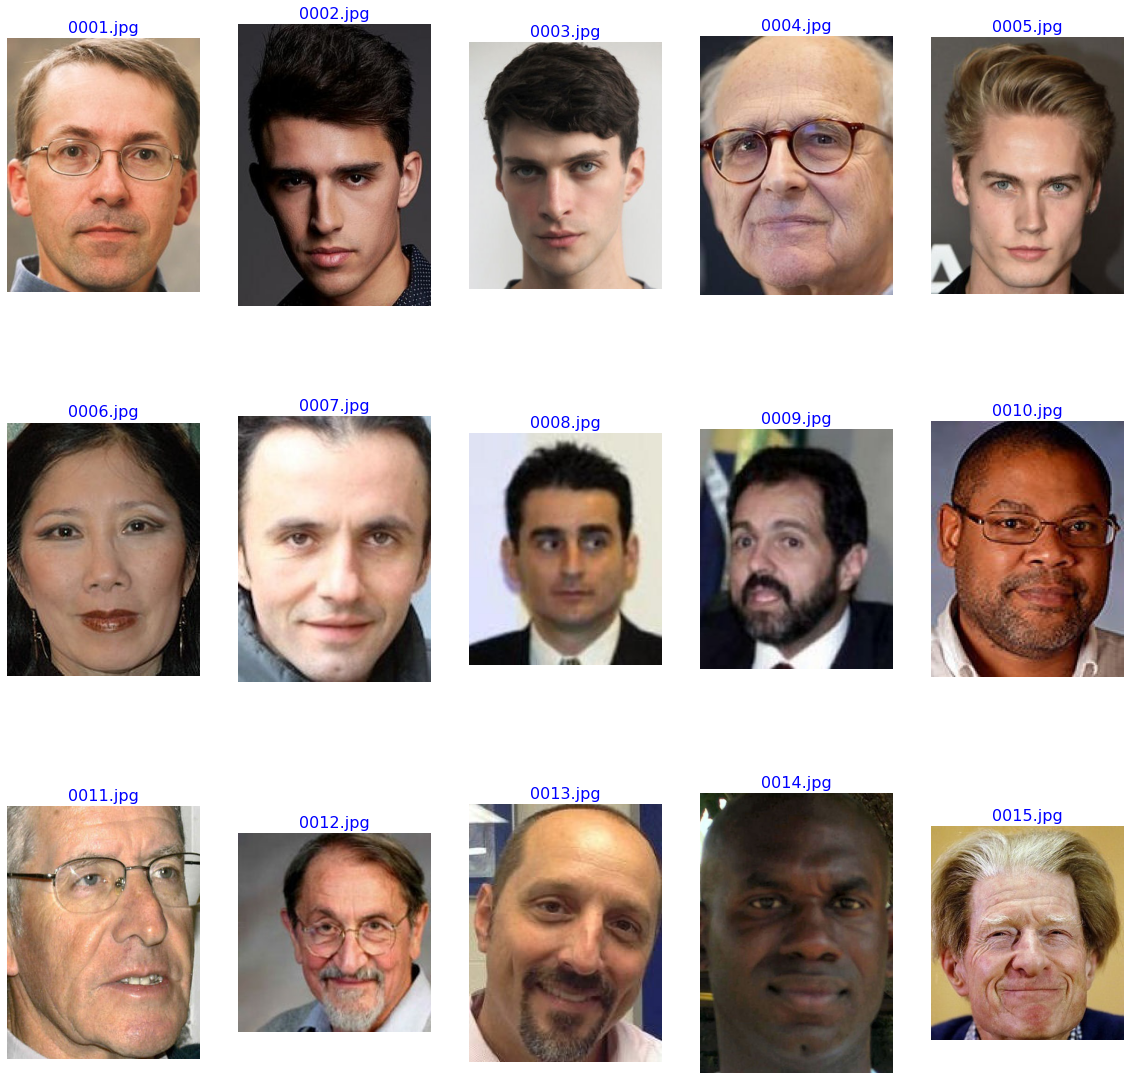

Average height=  377   average width=  294  average aspect ratio h/w=  1.282312925170068  image shape:  (300, 233, 3)


In [6]:
# train_df is balanced, Lets look at about 200 training images and get the average height, width and aspect ratio
#to use to select an image size for the model
savory_train_dir='/content/train/savory' # select one of the class directories in train set
flist=sorted(os.listdir(savory_train_dir)) # get a list of the files
ht, wt, file_count = 0,0,200
plt.figure(figsize=(20,20))
for i, f in enumerate(flist): # iterate through the files
    if i >=file_count:
        break  # only look at first file_count number of files to save time
    else: #As long as we are here might as well show 15 training images
        imgpath=os.path.join(savory_train_dir,f)
        img=plt.imread(imgpath)
        h,w,c=np.shape(img) # use numpy shape returns height, width
        ht += h
        wt += w
        if i < 15:
            plt.subplot(3,5,i+1)
            plt.axis('off')
            plt.title(f, color='blue', fontsize=16)
            plt.imshow(img)
plt.show()
ave_h=int(ht/file_count)
ave_w=int(wt/file_count)
aspect_ratio=ave_h/ave_w
# select an image size for the model 300 pixel height should be adequate to capture image features
img_size=(300, int(300/aspect_ratio))
img_shape=(img_size[0], img_size[1], 3)
print('Average height= ', ave_h, '  average width= ', ave_w, ' average aspect ratio h/w= ', aspect_ratio, ' image shape: ', img_shape)

In [7]:
# create train, test and valid generators
batch_size=30
trgen=ImageDataGenerator(horizontal_flip=True)
t_and_v_gen=ImageDataGenerator()

train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)

# for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)

# from the generator we can get information we will need later
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)
print ('{0:^12s}{1:^12s}'.format('class name', 'class index'))
for klass, index in zip(classes, class_indices):
    print(f'{klass:^12s}{str(index):^12s}')


Found 11220 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.
test batch size:  75   test steps:  8  number of classes :  2
 class name class index 
   savory        0      
  unsavory       1      


In [8]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(10, 10))
    length=len(labels)
    if length<10:   #show maximum of 10 images
        r=length
    else:
        r=10
    for i in range(r):
        plt.subplot(2,5, i + 1)
        image=images[i]/255
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()


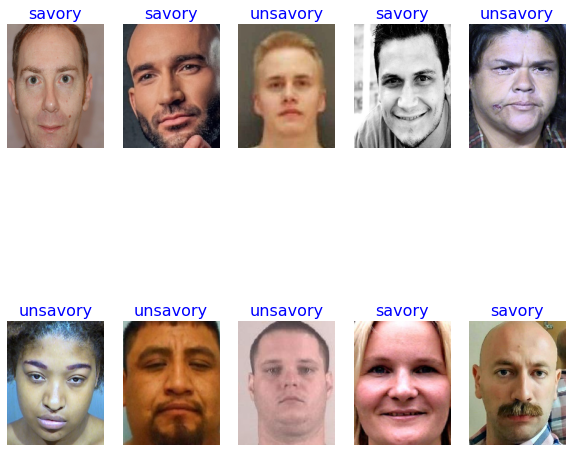

In [ ]:
show_image_samples(train_gen)

In [23]:
#define a function to plot the training data
def df_plot(df, start_epoch):
    #Plot the training and validation data
    tacc=df['accuracy']
    tloss=df['loss']
    vacc=df['val_accuracy']
    vloss=df['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    # axes[2].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    # axes[2].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    # axes[2].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    # axes[2].set_title('Training and Validation Accuracy')
    # axes[2].set_xlabel('Epochs')
    # axes[2].set_ylabel('Accuracy')
    # axes[2].legend()

    plt.tight_layout    
    plt.show()

In [18]:
#define a function to plot the training data
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['acc']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_acc']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    # axes[2].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    # axes[2].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    # axes[2].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    # axes[2].set_title('Training and Validation Accuracy')
    # axes[2].set_xlabel('Epochs')
    # axes[2].set_ylabel('Accuracy')
    # axes[2].legend()

    plt.tight_layout    
    plt.show()

## Model 1: Simple CNN

In [ ]:
## model 1: CNN

img_shape=(img_size[0], img_size[1], 3)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model_1 = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=img_shape),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=8, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 2 categories
    tf.keras.layers.Dense(2, activation='softmax')
  ])
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model_1.compile(
    optimizer= opt, 
    loss= 'binary_crossentropy',
    metrics=['accuracy'])
  


  from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  from tensorflow.python.keras.callbacks import ModelCheckpoint
  
  mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.0001) # dividing lr by 2 when val_accuracy fails to improve after 2 epochs

In [ ]:
# Fitting the CNN to the Training set
model_1_history= model_1.fit(train_gen, epochs = 30, verbose=1,validation_data= valid_gen, validation_steps=None,  shuffle=False, callbacks=[mc,red_lr]) 

Epoch 1/30
374/374 [==============================] - 52s 136ms/step - loss: 0.5306 - accuracy: 0.7323 - val_loss: 0.4078 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 2/30
374/374 [==============================] - 49s 130ms/step - loss: 0.4015 - accuracy: 0.8200 - val_loss: 0.3909 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 3/30
374/374 [==============================] - 49s 130ms/step - loss: 0.3545 - accuracy: 0.8437 - val_loss: 0.3608 - val_accuracy: 0.8233 - lr: 0.0010
Epoch 4/30
374/374 [==============================] - 49s 130ms/step - loss: 0.3061 - accuracy: 0.8697 - val_loss: 0.2977 - val_accuracy: 0.8817 - lr: 0.0010
Epoch 5/30
374/374 [==============================] - 49s 130ms/step - loss: 0.2762 - accuracy: 0.8859 - val_loss: 0.2731 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 6/30
374/374 [==============================] - 49s 130ms/step - loss: 0.2589 - accuracy: 0.8935 - val_loss: 0.1956 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 7/30
374/374 [==============================] 

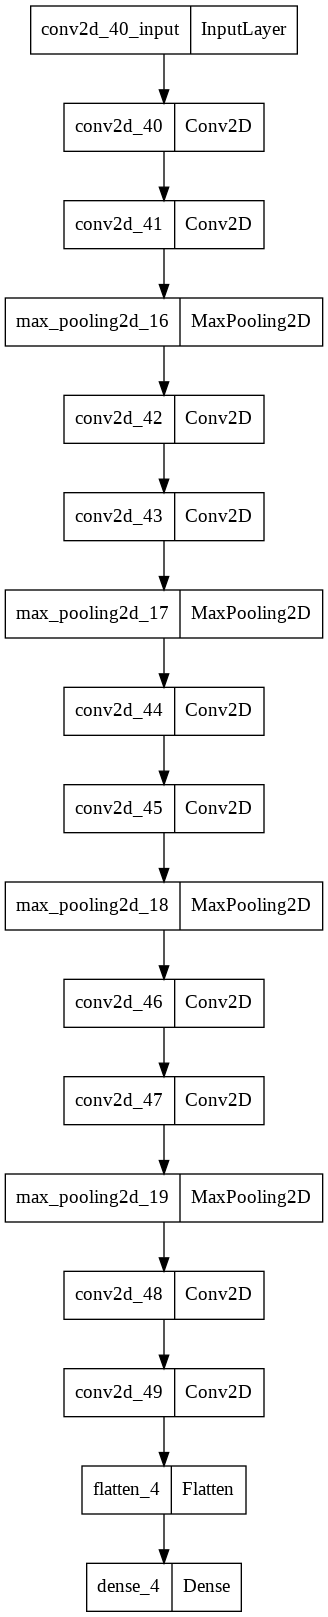

In [ ]:
# show architecture
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='model.png')

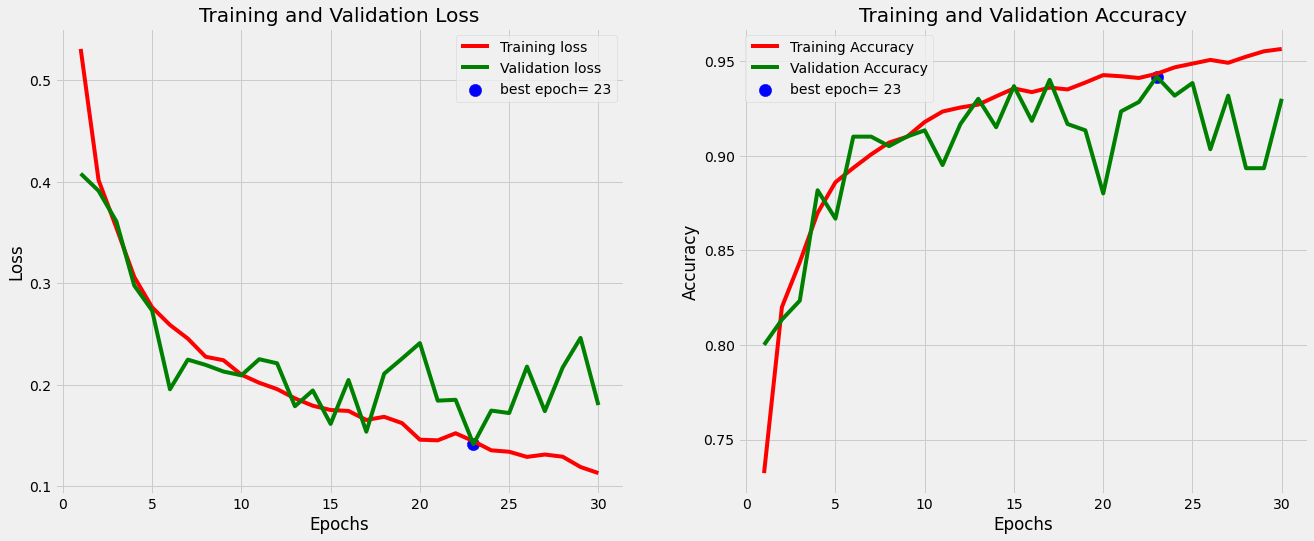

In [ ]:
tr_plot(model_1_history,0)

## Model 2: CNN + Batch Normalization + Dropout

In [32]:
## model 2: CNN:  add learning rate + batch normalization + dropout

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model_2 = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=img_shape),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=8, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 2 categories
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
  ])

  opt = keras.optimizers.Adam(learning_rate=0.001)
  model_2.compile(
    optimizer= opt, 
    loss= 'binary_crossentropy',
    metrics=['accuracy'])
  
  from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  from tensorflow.python.keras.callbacks import ModelCheckpoint 
  mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.0001) # dividing lr by 2 when val_accuracy fails to improve after 2 epochs

In [33]:
# Fitting the CNN to the Training set
model_2_history= model_2.fit(train_gen, epochs = 30, verbose=1,validation_data= valid_gen, validation_steps=None,  shuffle=False, callbacks=[mc,red_lr]) 

Epoch 1/30
374/374 [==============================] - 52s 137ms/step - loss: 0.4583 - accuracy: 0.7886 - val_loss: 0.4289 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 2/30
374/374 [==============================] - 52s 139ms/step - loss: 0.3307 - accuracy: 0.8590 - val_loss: 0.3388 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 3/30
374/374 [==============================] - 51s 135ms/step - loss: 0.3003 - accuracy: 0.8709 - val_loss: 0.4886 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 4/30
374/374 [==============================] - 51s 135ms/step - loss: 0.2757 - accuracy: 0.8833 - val_loss: 0.3782 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 5/30
374/374 [==============================] - 50s 134ms/step - loss: 0.2528 - accuracy: 0.8947 - val_loss: 0.2789 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/30
374/374 [==============================] - 50s 134ms/step - loss: 0.2355 - accuracy: 0.9050 - val_loss: 0.3908 - val_accuracy: 0.8067 - lr: 0.0010
Epoch 7/30
374/374 [==============================] 

In [34]:
# convert the history.history dict to a pandas DataFrame:     
hist_df_2 = pd.DataFrame(model_2_history.history) 
hist_df_2.to_csv('/content/df_2.csv')

In [28]:
# pd.read_csv('/content/df_2.csv')

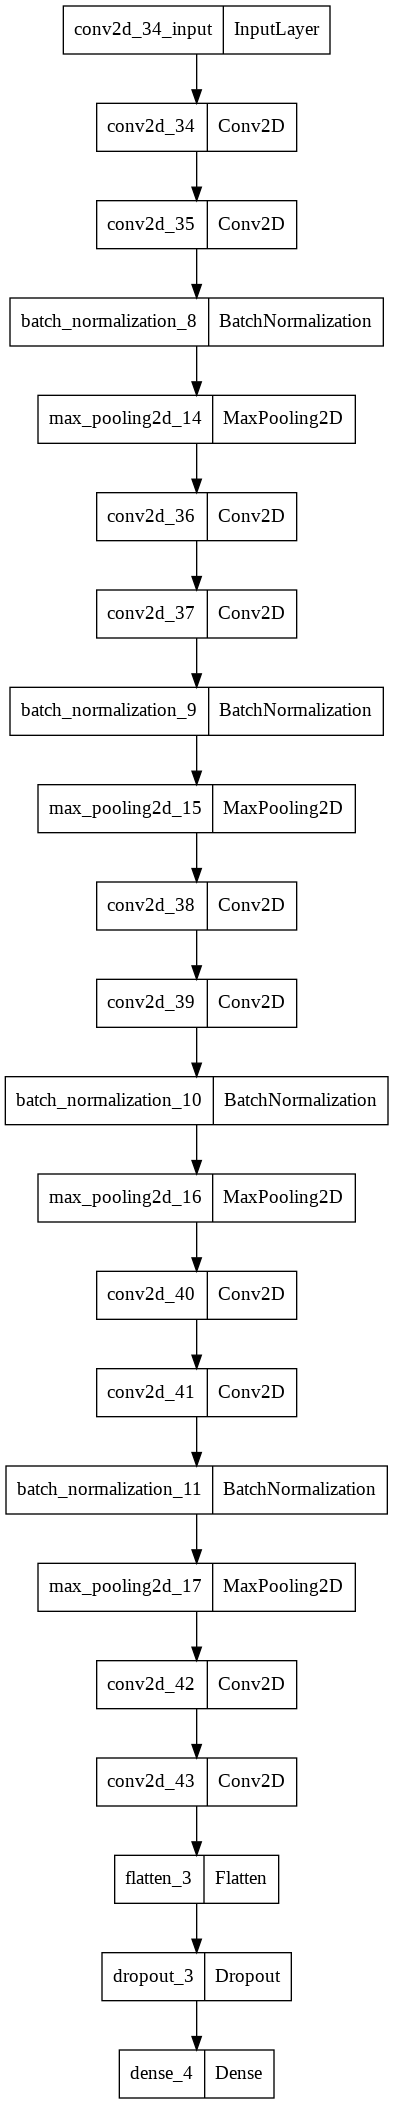

In [35]:
# show architecture
from tensorflow.keras.utils import plot_model
plot_model(model_2, to_file='model.png')

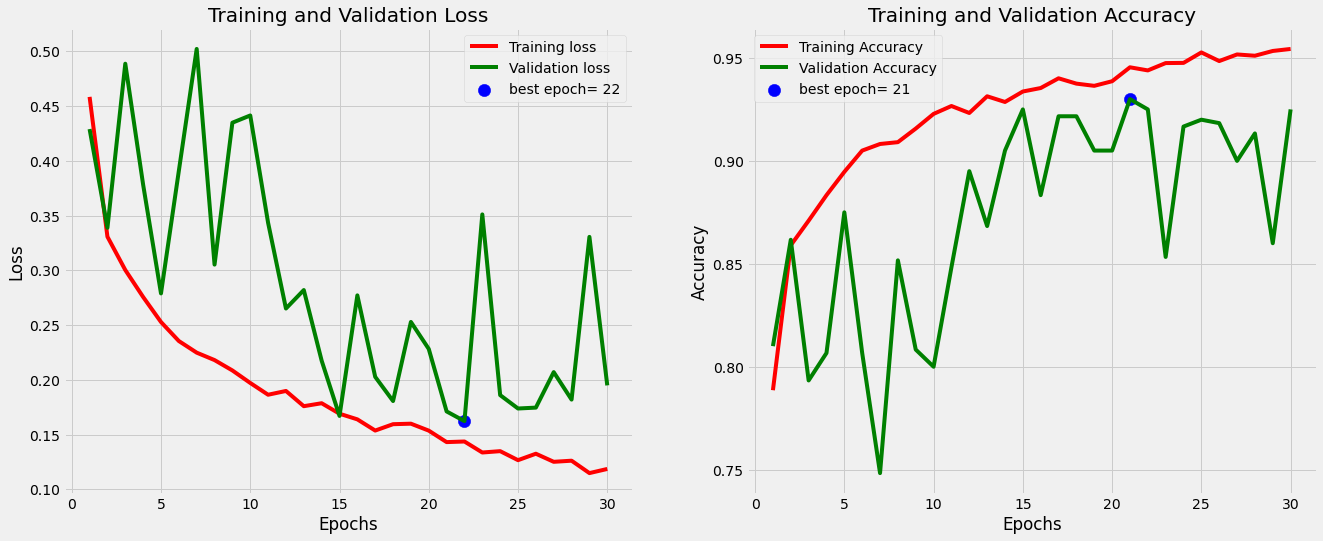

In [36]:
df_plot(pd.read_csv('/content/df_2.csv'),0)

## Model 3: Deeper Network + More Filter

In [41]:
# Model 3: increase filter & kernal size 

img_shape=(img_size[0], img_size[1], 3)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model_3 = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=img_shape),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=img_shape),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),


    tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 2 categories
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
  ])
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model_3.compile(
    optimizer= opt, 
    loss= 'binary_crossentropy',
    metrics=['accuracy'])
  
  from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  from tensorflow.python.keras.callbacks import ModelCheckpoint
  
  mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.0001) # dividing lr by 2 when val_accuracy fails to improve after 2 epochs

In [42]:
# Fitting the CNN to the Training set
model_3_history= model_3.fit(train_gen, epochs = 30, verbose=1,validation_data= valid_gen, validation_steps=None,  shuffle=False, callbacks=[mc,red_lr]) 

Epoch 1/30
374/374 [==============================] - 55s 145ms/step - loss: 0.6881 - accuracy: 0.5324 - val_loss: 0.6312 - val_accuracy: 0.5183 - lr: 0.0010
Epoch 2/30
374/374 [==============================] - 53s 141ms/step - loss: 0.5626 - accuracy: 0.6993 - val_loss: 0.4394 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 3/30
374/374 [==============================] - 53s 140ms/step - loss: 0.4482 - accuracy: 0.7950 - val_loss: 0.3299 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 4/30
374/374 [==============================] - 52s 140ms/step - loss: 0.3741 - accuracy: 0.8354 - val_loss: 0.2756 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 5/30
374/374 [==============================] - 52s 140ms/step - loss: 0.3431 - accuracy: 0.8529 - val_loss: 0.2358 - val_accuracy: 0.8983 - lr: 0.0010
Epoch 6/30
374/374 [==============================] - 52s 139ms/step - loss: 0.3015 - accuracy: 0.8730 - val_loss: 0.2756 - val_accuracy: 0.8917 - lr: 0.0010
Epoch 7/30
374/374 [==============================] 

In [43]:
# convert the history.history dict to a pandas DataFrame:     
hist_df_3 = pd.DataFrame(model_3_history.history) 
hist_df_3.to_csv('/content/df_3.csv')

In [ ]:
# pd.read_csv('/content/df_3.csv')

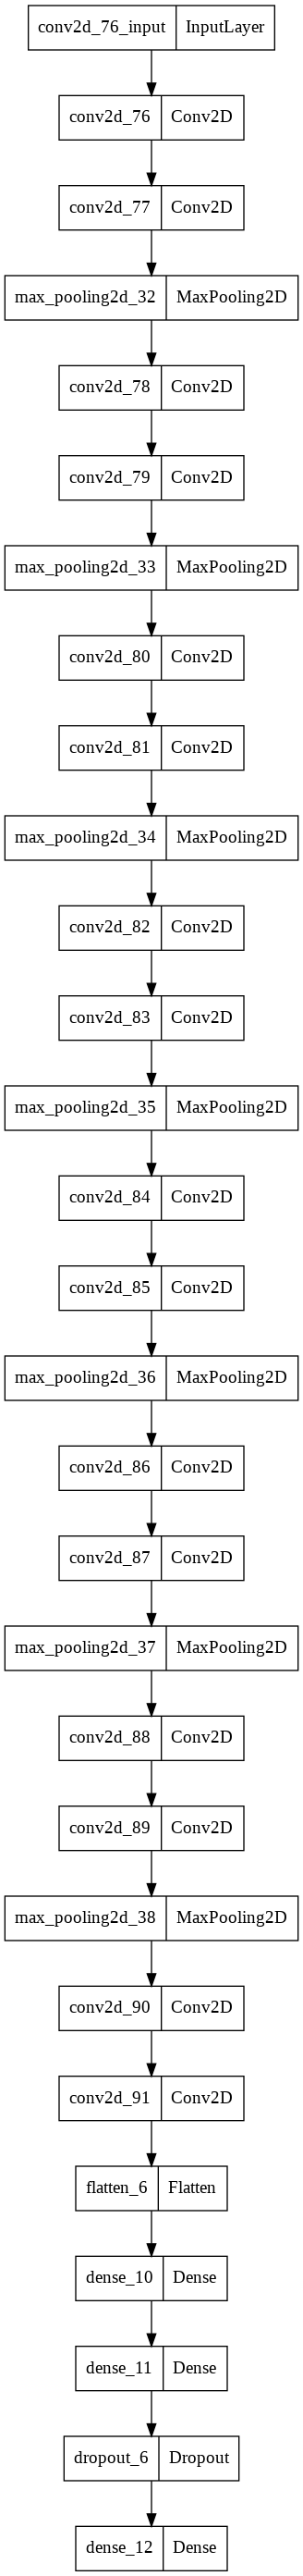

In [44]:
# show architecture
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='model.png')

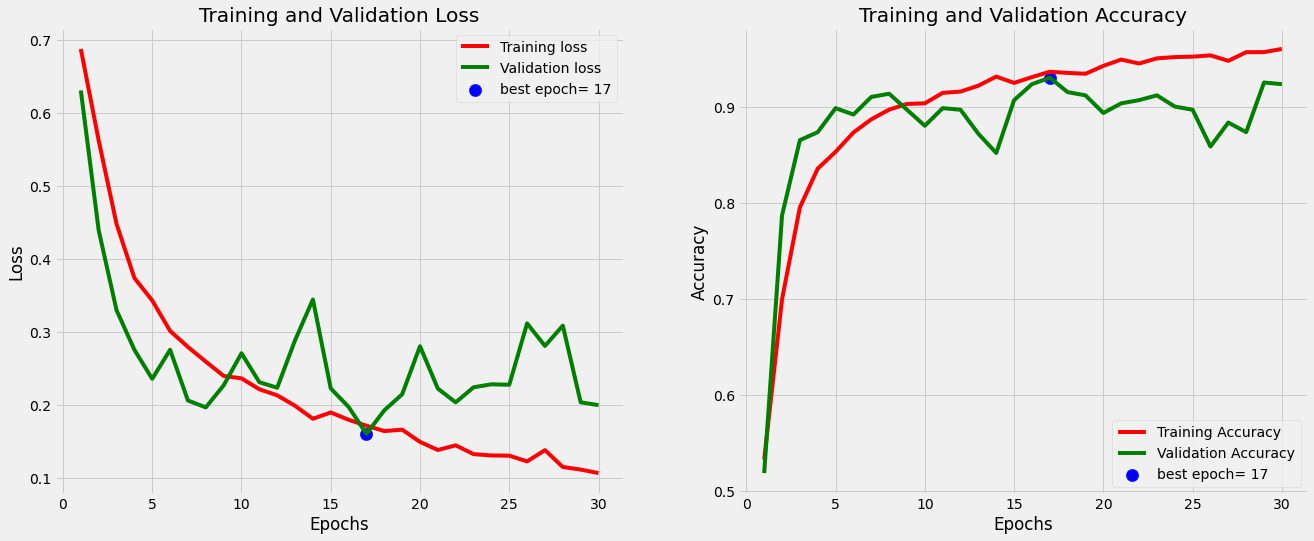

In [45]:
df_plot(pd.read_csv('/content/df_3.csv'),0)

## Model 4: Squeeze Net

In [ ]:
# Create function to define fire modules
def fire(x, squeeze, expand):
  y = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x) 
  y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y) # note: //2 takes input value and divides by 2, so we reach the dimensions requested with stacking later.
  y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, padding='same', activation='relu')(y)
  return tf.keras.layers.concatenate([y1, y3])

# this is to make it behave similarly to other Keras layers
def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)


with tf.device('/device:GPU:0'): 
            x = tf.keras.layers.Input(shape=img_shape) # input is 192x192 pixels RGB

            y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
            y = tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu')(y)

            y = fire_module(24, 48)(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)

            y = fire_module(24, 48)(y)
            y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)

            y = fire_module(24, 48)(y)

            y = tf.keras.layers.GlobalAveragePooling2D()(y) # Takes average of h x w for each channel and returns 1 scalar value per channel
            y = tf.keras.layers.Dense(2, activation='softmax')(y) # Parameters for final layer from GAP = number of channels in previous layer plus number of dense nodes in output layer times number of dense nodes

            model_6 = tf.keras.Model(x, y)
            opt = keras.optimizers.Adam(learning_rate=0.001)
        
            model_6.compile(loss='binary_crossentropy', optimizer= opt, metrics=['acc']) 
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint
      
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.0001) # dividing lr by 2 when val_accuracy fails to improve after 2 epochs

In [ ]:
model_6_history = model_6.fit(train_gen, epochs = 30, verbose=1,validation_data= valid_gen, validation_steps=None,  shuffle=False,callbacks=[mc,red_lr]) 

Epoch 1/30
374/374 [==============================] - ETA: 0s - loss: 0.6362 - acc: 0.6240
Epoch 00001: val_acc improved from -inf to 0.66000, saving model to best_model.h5
374/374 [==============================] - 162s 421ms/step - loss: 0.6362 - acc: 0.6240 - val_loss: 0.5809 - val_acc: 0.6600 - lr: 0.0010
Epoch 2/30
374/374 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.7002
Epoch 00002: val_acc improved from 0.66000 to 0.75833, saving model to best_model.h5
374/374 [==============================] - 156s 416ms/step - loss: 0.5623 - acc: 0.7002 - val_loss: 0.5352 - val_acc: 0.7583 - lr: 0.0010
Epoch 3/30
374/374 [==============================] - ETA: 0s - loss: 0.5163 - acc: 0.7382
Epoch 00003: val_acc did not improve from 0.75833
374/374 [==============================] - 156s 416ms/step - loss: 0.5163 - acc: 0.7382 - val_loss: 0.6168 - val_acc: 0.6967 - lr: 0.0010
Epoch 4/30
374/374 [==============================] - ETA: 0s - loss: 0.4746 - acc: 0.7684
Epoch

In [ ]:
#Extract learning rate callback
best_model_epoch=np.argmax(model_6.history.history['val_acc'])+1 # epoch of best model
print(best_model_epoch)

30


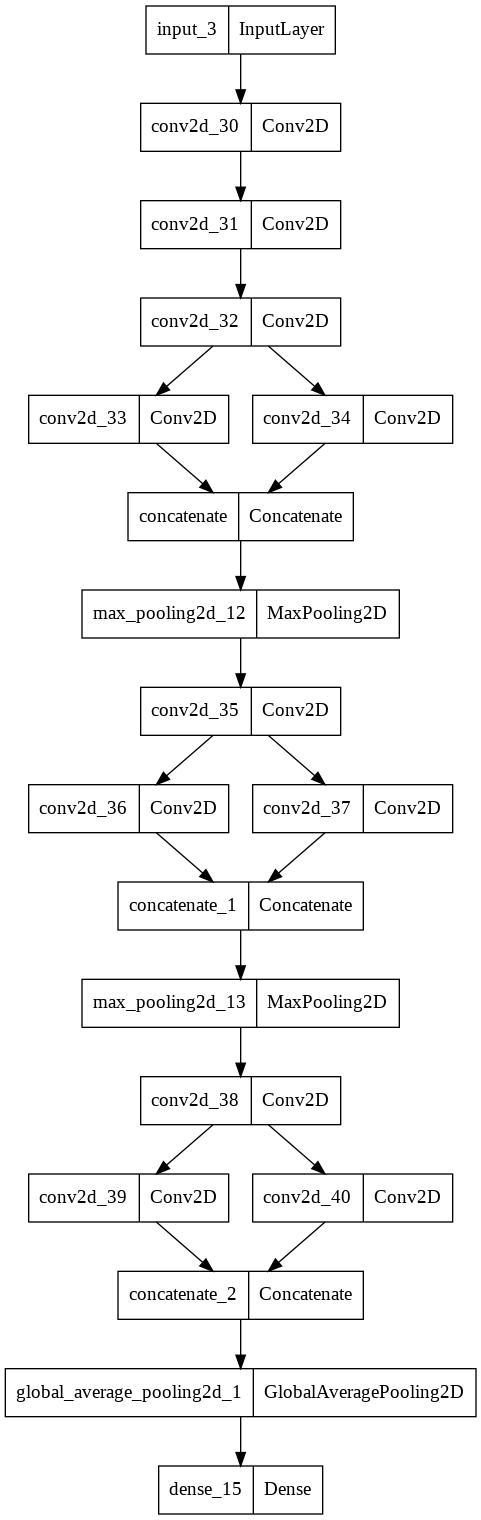

In [ ]:
# show architecture 
plot_model(model_6, to_file='model.png')

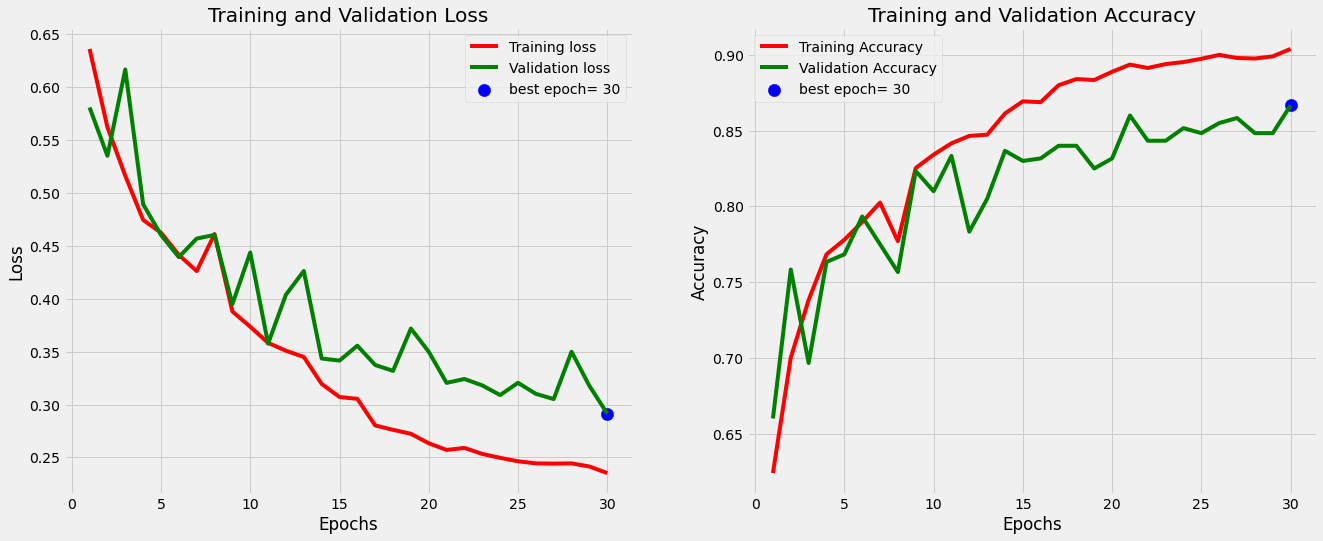

In [ ]:
tr_plot(model_6_history,0)

## Model 5: ResNet50

In [ ]:
# example of loading a version of the Resnet Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [ ]:

# Create the base model from the pre-trained model ResNet
base_model = ResNet50(input_shape=img_shape, include_top=False, weights='imagenet')

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
# Next step: Freeze the weights of the model so that they are not trained with you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

# base_model.summary() # Note the trainable parameters at the bottom now equal zero.

In [ ]:
# Create new classifier layers (and plug into output of last layer from above model using "model.layers[-1].output")
gap1 = GlobalAveragePooling2D()(base_model.layers[-1].output)
output = Dense(2, activation='softmax')(gap1)
# define new model
model_4 = Model(inputs=base_model.inputs, outputs=output)
# summarize
model_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 233, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 239, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 117, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# Fit Resnet model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model_4.compile(loss='binary_crossentropy', optimizer= opt, metrics=['acc']) 
  mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.0001) # dividing lr by 2 when val_accuracy fails to improve after 2 epochs

In [ ]:
model_4_history = model_4.fit(train_gen, epochs = 30, verbose=1,validation_data= valid_gen,validation_steps=None,  shuffle=False, callbacks=[mc,red_lr]) 

Epoch 1/30
374/374 [==============================] - ETA: 0s - loss: 0.3089 - acc: 0.8784
Epoch 00001: val_acc improved from -inf to 0.90833, saving model to best_model.h5
374/374 [==============================] - 135s 346ms/step - loss: 0.3089 - acc: 0.8784 - val_loss: 0.2273 - val_acc: 0.9083 - lr: 0.0010
Epoch 2/30
374/374 [==============================] - ETA: 0s - loss: 0.2058 - acc: 0.9209
Epoch 00002: val_acc did not improve from 0.90833
374/374 [==============================] - 127s 338ms/step - loss: 0.2058 - acc: 0.9209 - val_loss: 0.2478 - val_acc: 0.8833 - lr: 0.0010
Epoch 3/30
374/374 [==============================] - ETA: 0s - loss: 0.1803 - acc: 0.9323
Epoch 00003: val_acc improved from 0.90833 to 0.92833, saving model to best_model.h5
374/374 [==============================] - 127s 339ms/step - loss: 0.1803 - acc: 0.9323 - val_loss: 0.1771 - val_acc: 0.9283 - lr: 0.0010
Epoch 4/30
374/374 [==============================] - ETA: 0s - loss: 0.1645 - acc: 0.9367
Epoch

In [ ]:
#Extract learning rate callback
best_model_epoch=np.argmax(model_4.history.history['val_acc'])+1 # epoch of best model
print(best_model_epoch)

7


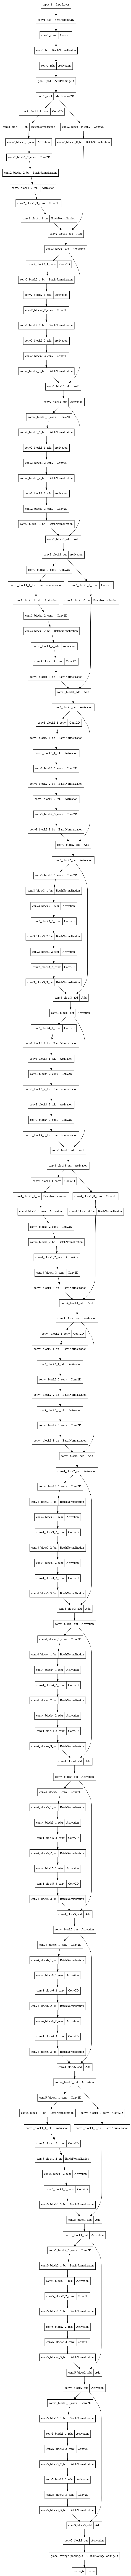

In [ ]:
# show architecture 
plot_model(model_4, to_file='model.png')

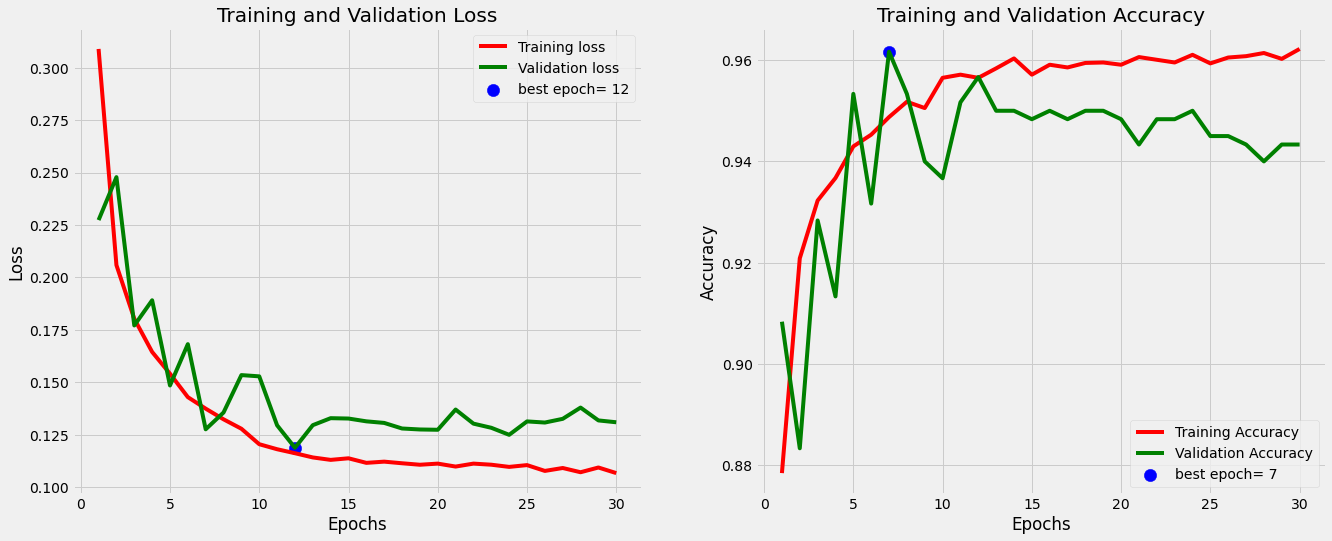

In [ ]:
tr_plot(model_4_history,0)

## Model 6: Efficient Net



In [ ]:
# create an efficientNetB3 model to use for transfer learning
from tensorflow.keras.applications import efficientnet as efn

base_model= efn.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=False


43950080/43941136 [==============================] - 1s 0us/step


In [ ]:
# Create new classifier layers (and plug into output of last layer from above model using "model.layers[-1].output")
norm1 = BatchNormalization(momentum=0.99, epsilon=0.001)(base_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(norm1)
drop1 = Dropout(rate= 0.3, seed=123)(class1)

class2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(rate= 0.45, seed=123)(class2)

output = Dense(2, activation='softmax')(drop2)
# define new model
model_5 = Model(inputs=base_model.inputs, outputs=output)
# summarize
model_5.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 233, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 300, 233, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 300, 233, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 301, 235, 3)  0           ['normalization[0][0]']    

In [ ]:
# Fit Resnet model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model_5.compile(loss='binary_crossentropy', optimizer= opt, metrics=['acc']) 
  mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.0001) # dividing lr by 2 when val_accuracy fails to improve after 2 epochs

In [ ]:
model_5_history = model_5.fit(train_gen, epochs = 30, verbose=1,validation_data= valid_gen,validation_steps=None,  shuffle=False, callbacks=[mc,red_lr]) 

Epoch 1/30
374/374 [==============================] - ETA: 0s - loss: 0.3407 - acc: 0.8640
Epoch 00001: val_acc improved from -inf to 0.93500, saving model to best_model.h5
374/374 [==============================] - 159s 386ms/step - loss: 0.3407 - acc: 0.8640 - val_loss: 0.1770 - val_acc: 0.9350 - lr: 0.0010
Epoch 2/30
374/374 [==============================] - ETA: 0s - loss: 0.2521 - acc: 0.8997
Epoch 00002: val_acc improved from 0.93500 to 0.94167, saving model to best_model.h5
374/374 [==============================] - 140s 375ms/step - loss: 0.2521 - acc: 0.8997 - val_loss: 0.1545 - val_acc: 0.9417 - lr: 0.0010
Epoch 3/30
374/374 [==============================] - ETA: 0s - loss: 0.2164 - acc: 0.9156
Epoch 00003: val_acc did not improve from 0.94167
374/374 [==============================] - 142s 378ms/step - loss: 0.2164 - acc: 0.9156 - val_loss: 0.1570 - val_acc: 0.9383 - lr: 0.0010
Epoch 4/30
374/374 [==============================] - ETA: 0s - loss: 0.2035 - acc: 0.9222
Epoch

In [ ]:
#Extract learning rate callback
best_model_epoch=np.argmax(model_5.history.history['val_acc'])+1 # epoch of best model
print(best_model_epoch)

12


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.861836 to fit



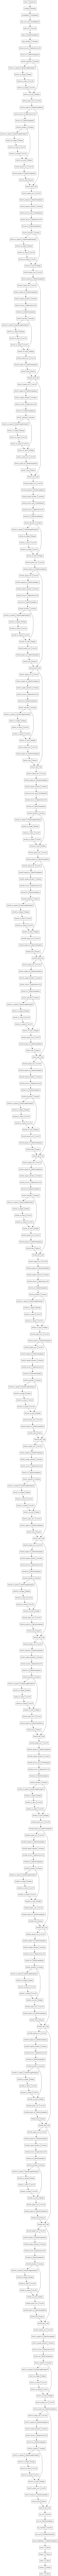

In [ ]:
# show architecture 
plot_model(model_5, to_file='model.png')

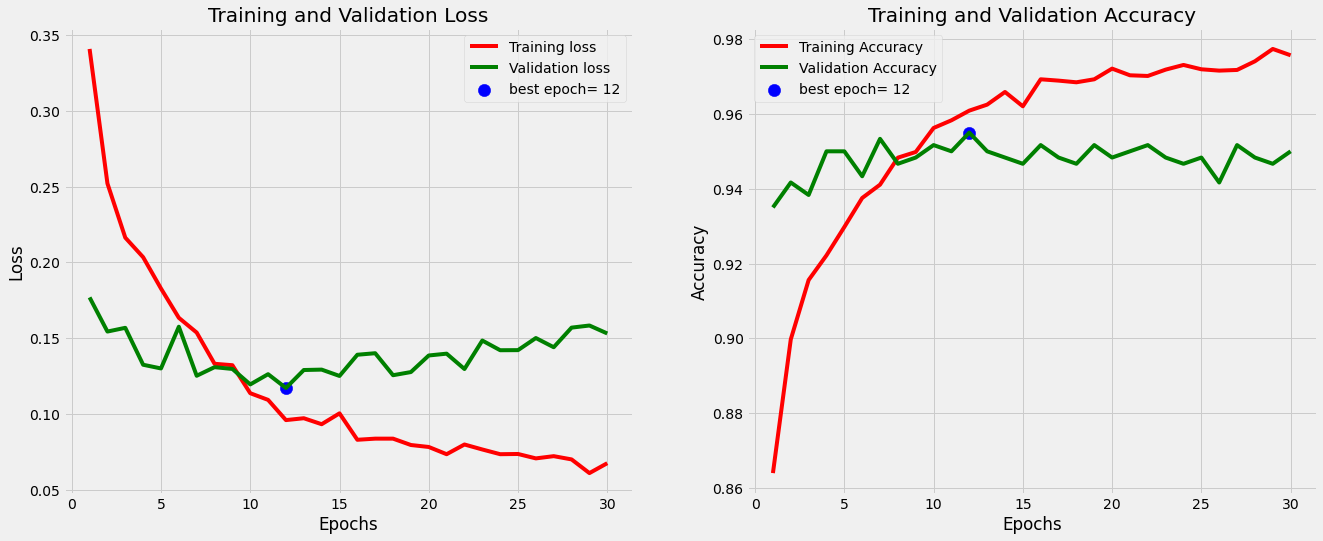

In [ ]:
tr_plot(model_5_history,0)



---


# Q5: [20 pts] select the model that best fits the problem you are trying to solve and discuss why it fulfills this purpose

## 5.1 Best Performer: EfficientNet 
### (1) Metrics:
Based on validation accuracy and loss, EfficientNet achieves the highest performance. Among all six models, it has the highest training accuracy of 0.97 and highest validation score of above 0.94. (As showed in the plots below)

EfficientNet also has a high starting point of 0.93 validation accuracy at epoch 1, and reach the highest validation accuracy and loss at epoch 12. However, most of other non-transfer learning models start at a low range of 0.5-0.8 in epoch 1, and reach the their best validation result after epoch 20. This indicates the improved efficiency and constrianed resources by this model. EfficientNet can be easily employed without requiring a lot of further training and computation power. 

### (2) Reason for Best Fit:

First of all, this is a transfer learning model pretrained on ImageNet, which is an enormous corpus of photograhs. Deploying a pretrained model from Keras Applications, I could use weights that are already calibrated to make image classification of this type. This approach is effective because the model has efficiently learned to extract features from human facial images in order to perform well on this related task.

Second, EfficientNet itself is a high performance architecture for image classification problem. CNN could be scaled up for better accuracy if more resources are available. Thus, by carefully balancing network depth, width, and resolution, a model can lead to better performance. EfficientNet use compound scaling coefficient to easily scale up a baseline ConvNet to any target resource constraints in a more principled way, while maintaining model efficiency. (Tan and Le, 2019) 

## 5.2 Other Models' Performance Evaluation:
(1) Overall, transfer learning models present significantly better performance than other non-pretrained models. Both ResNet50 and EfficientNet are trained on ImageNet, which contains a lot of human face pictures already. In training a classifier to predict whether a person has genetic predisposition of comitting crimes, I could use the knowledge pretrained model gained during training to extract human facial/ appearance features. 

- ResNet 50 also has a great performance, with only a slight lower accuracy metrics than the winner EfficienntNet. Besides accuracy, I pick EfficientNet as a winner because its pre-trained version does not require a lot of further computation. By comparision, ResNet started at around 0.9 validation accuracy in first few epoches, with a lot of fluctations. Validation accuracy only reach a higher level and maintain stable until the epoch 15, indicating a lot of computation involved. 

- In conclusion, I still think the pre-trained ResNet50 performs well overall. The main benefit of ResNet model is to avoid poor accuracy as the model becomes deeper. The ResNet also aims to address the Vanishing Gradient issue. In the future, I would consider training more epoches and comparig its performance with other models again.  


(2) When comparing all non-transfer learning models (model 1,2,3,4), model 1 (simple CNN) generates the best performance. 
- Model 2: Adding dropout and batch normalization layers does not improve the model. This may because the dropout rate is set at 0.5, which loses a lot of information and introduces too many noise in the process. In future, I will adjust the dropout rate instead of setting it arbitrarily. 

- Model 3: Having a too deep network does not improve performance as well. Model 3 has 9 more convolutional layers, 2 more fully connected layers, and 1 more dropout layer, than Model 1. However, these layers do not generate better result. There are a lot of fluctuations of metrics in the early training stage. The network architecture is limited by the amount of data in training. Too many layers could lead to a overfitting problem. Besides, a deep network requires a lot of computational power and storage place. These may all contribute to the worse performance of this model.

- Model 4: SqueezeNet has the worst performance, in terms of lowest training and validation accuracy. However, it does provides the advantages of smaller size model by finishing the training fast. To further improve accuracy, I would delve deeper on hyperparameter tuning and potentially retry using a pretrained version. 

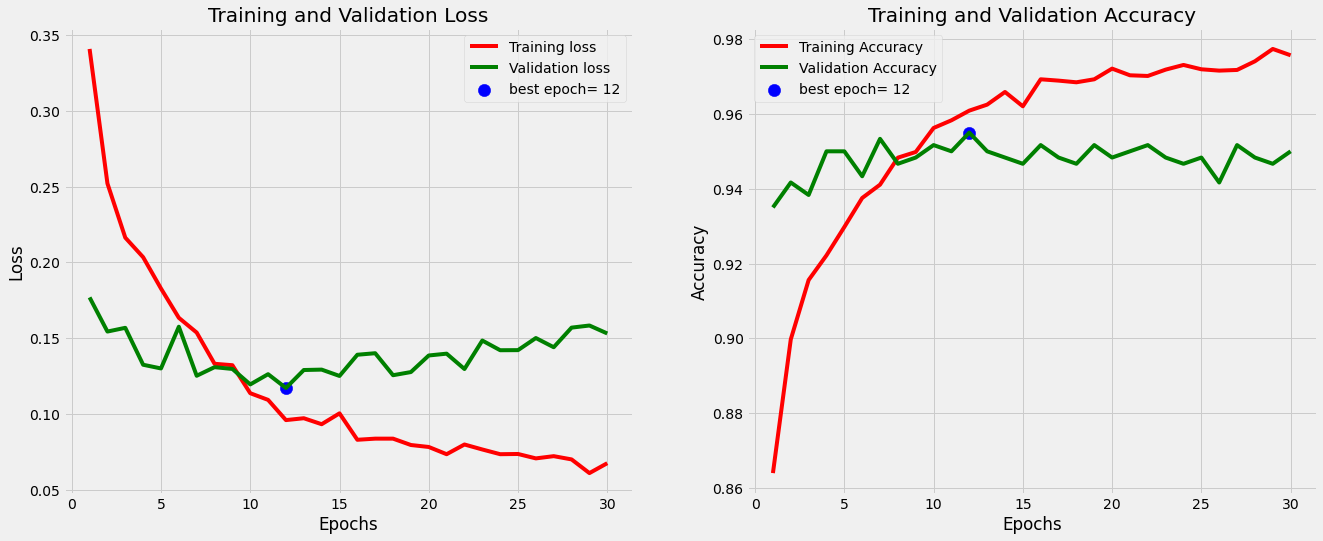

In [ ]:
tr_plot(model_5_history,0)
# Efficient Net Training History 

# Reference (APA)

Gerry Piosenka (2022, March). Good Guys-Bad Guys Image Data Set, Version 1. Retrieved May 7, 2022 from https://www.kaggle.com/datasets/gpiosenka/good-guysbad-guys-image-data-set/.


He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).

Iandola, F. N., Han, S., Moskewicz, M. W., Ashraf, K., Dally, W. J., & Keutzer, K. (2016). SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and< 0.5 MB model size. arXiv preprint arXiv:1602.07360.

Morales, Marco. QMSS-GR5074_Spring2022 Github Repository, Week07-CNN-Starter-Code jupyter notebook. 
https://github.com/marco-morales/QMSS-GR5074_Spring2022/tree/main/week-07/notebooks

Tan, M., & Le, Q. (2019, May). Efficientnet: Rethinking model scaling for convolutional neural networks. In International conference on machine learning (pp. 6105-6114). PMLR.